In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

---
# sid_201 part 3
---

In [2]:
# read intervention data
intv_df = pd.read_csv('/sfxhome/gkang/tlc_data/intv_201.csv')
infection_trace_df = pd.read_csv('/sfxhome/gkang/tlc_data/infection_trace_201.csv')

In [3]:
# read chicago population data
household_df = pd.read_csv('/sfxhome/gkang/tlc_data/chicago_household.csv')
person_df = pd.read_csv('/sfxhome/gkang/tlc_data/chicago_person_info.csv')

---
### merge with person and household tables
---

In [ ]:
# join person data with intv data
person_intv_df = pd.merge(intv_df, person_df, left_on = 'pid', right_on = 'PID')
person_intv_df

In [ ]:
# join all tables: person, household, intv
all_intv_df = pd.merge(person_intv, household_df, on = 'HID', how = 'inner')
all_intv_df

---
### calculate incidence
---

In [10]:
intv_df

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135
5,3,40,294301186,1,201,0.000135
6,3,40,301957749,1,201,0.000135
7,3,40,290904046,1,201,0.000135
8,3,40,288207887,1,201,0.000135
9,3,40,294563871,1,201,0.000135


In [16]:
# daily incidence
daily_count = intv_df.groupby(['rep','intervened'])['ig_type'].count().reset_index()
daily_count

,rep,intervened,ig_type
0,0,8,1
1,0,9,4
2,0,10,2
3,0,12,8
4,0,13,4
5,0,14,9
6,0,15,11
7,0,16,19
8,0,17,16
9,0,18,32


In [15]:
# cumulative incidence
cumulative_count = intv_df.groupby(['rep','intervened'])['ig_type'].count().cumsum().reset_index()
cumulative_count

,rep,intervened,ig_type
0,0,8,1
1,0,9,5
2,0,10,7
3,0,12,15
4,0,13,19
5,0,14,28
6,0,15,39
7,0,16,58
8,0,17,74
9,0,18,106


---
### Plot
---

In [9]:
df = intv_df.groupby(['rep','intervened'])['ig_type'].count().cumsum().reset_index()
df

,rep,intervened,ig_type
0,0,8,1
1,0,9,5
2,0,10,7
3,0,12,15
4,0,13,19
5,0,14,28
6,0,15,39
7,0,16,58
8,0,17,74
9,0,18,106


In [17]:
df = intv_df.sample(500000)
sns.lmplot(x='intervened', y='ig_type', hue='rep', fit_reg=False, data=df)

In [ ]:
cumulative_count = intv_df.\
    groupby(['rep','intervened'])['ig_type'].\
    count().\
    groupby(level=[0]).cumsum()

In [ ]:
# plotting

#intv_df.groupby(['rep','intervened'])['ig_type'].count().cumsum().reset_index()
#sns.pointplot(x='intervened', y='ig_type', hue='rep', data=intv_df)
#sns.lmplot(x='intervened', y='ig_type', hue='rep', fit_reg=False, data=df)

### Plot cumulative incidence

In [18]:
cumulative_count = intv_df.\
    groupby(['rep','intervened', 'tr'])['ig_type'].\
    count().\
    groupby(level=[0]).\
    cumsum().\
    reset_index()

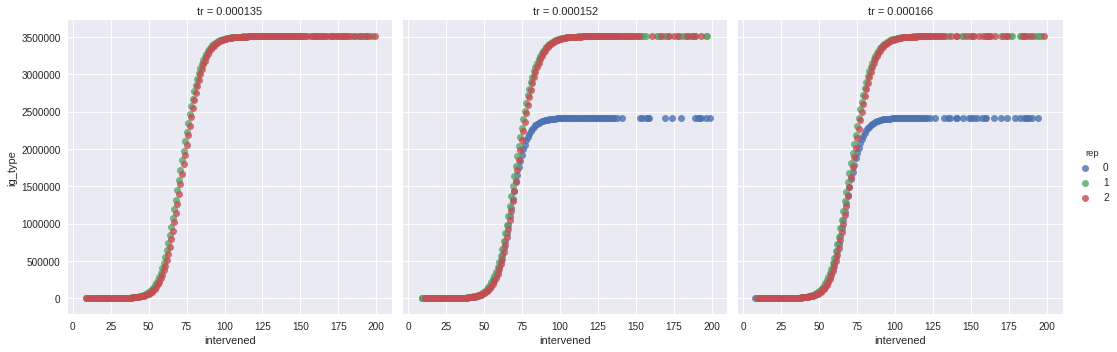

In [20]:
sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data=cumulative_count.reset_index())

### Plot daily infection??

In [21]:
blah = intv_df.\
    groupby(['rep','intervened', 'tr'])['ig_type'].\
    count().\
    groupby(level=[0]).mean()

In [22]:
blah

rep
0    8563.024823
1    7715.925275
2    7645.172113
Name: ig_type, dtype: float64

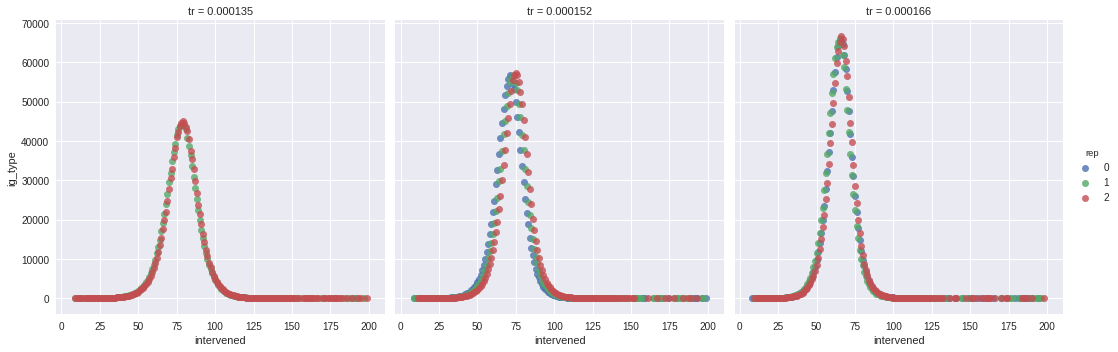

In [23]:
blah = intv_df.\
    groupby(['rep','intervened', 'tr'])['ig_type'].\
    count().\
    groupby(level=[0, 1, 2]).\
    mean()

sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',
           fit_reg=False, data=blah.reset_index())

# we plot stuff

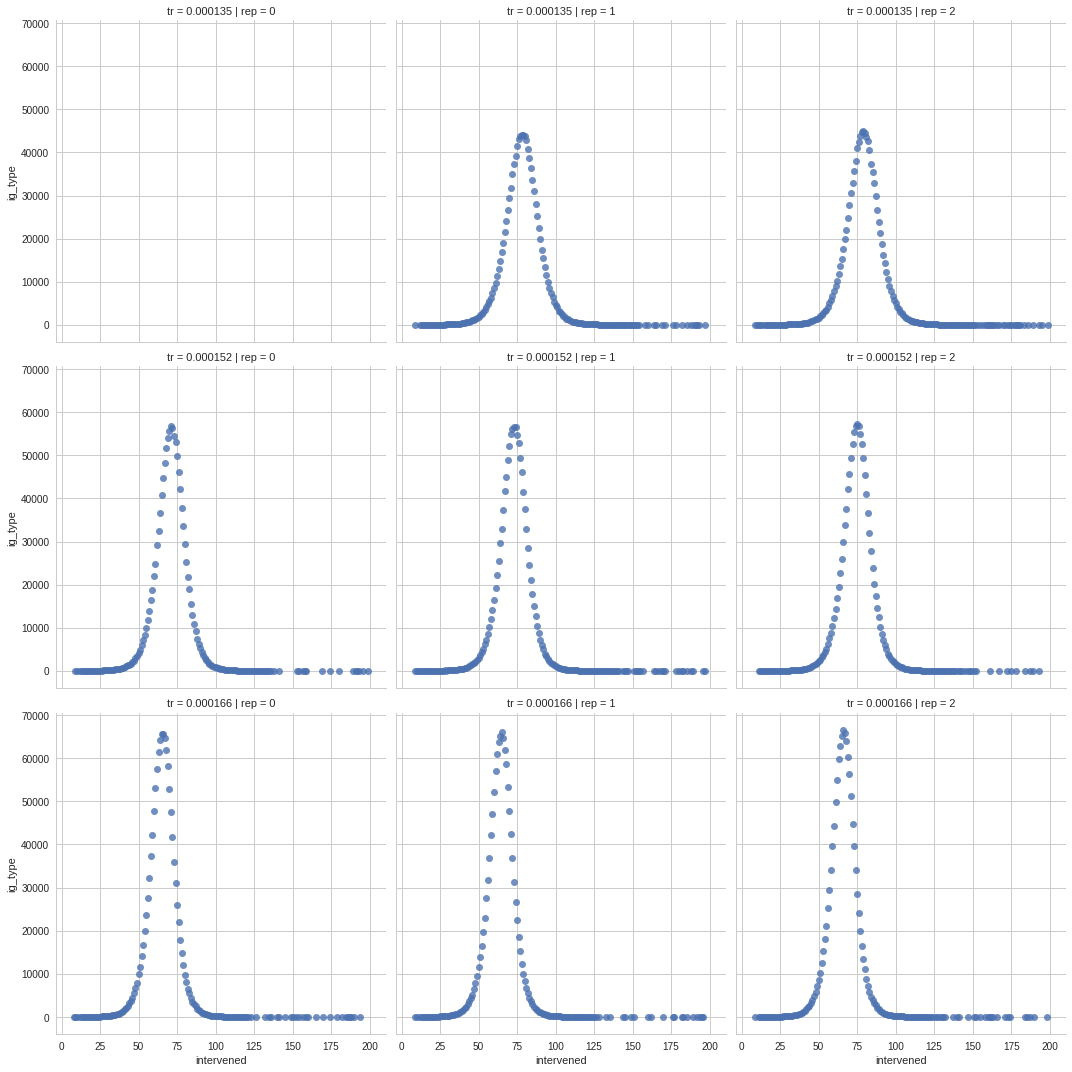

In [97]:
df_rit = intv_df.\
    groupby(['rep', 'intervened', 'tr'])['ig_type'].\
    count().\
    reset_index()

sns.lmplot(x='intervened', y='ig_type',
           col='rep', row='tr',
           fit_reg=False, data=df_rit)

In [98]:
df = intv_df.\
    groupby(['rep', 'intervened', 'tr'])['ig_type'].\
    count().\
    groupby(level=['tr', 'intervened']).mean().reset_index()

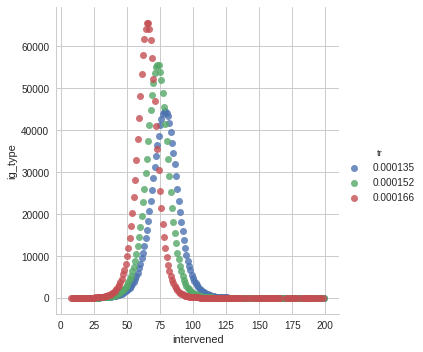

In [99]:
sns.lmplot(x='intervened', y='ig_type', hue='tr',
           fit_reg=False, data=df)

# cumulative count

In [100]:
d = intv_df.\
    groupby(['rep', 'intervened', 'tr'])['ig_type'].\
    count().\
    reset_index()

In [101]:
d['cum_sum'] = d.groupby(['rep', 'tr'])['ig_type'].cumsum()

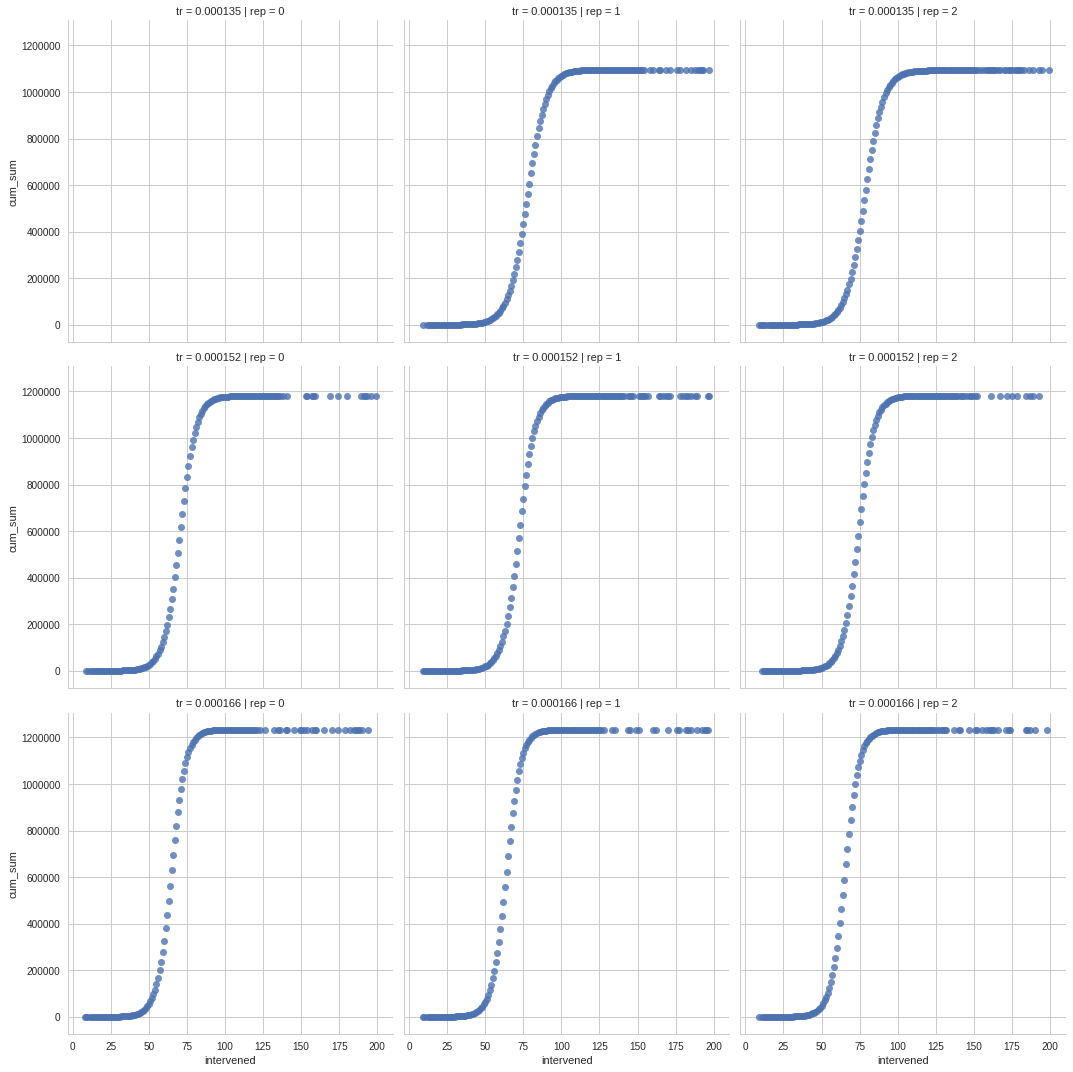

In [102]:
sns.lmplot(x='intervened', y='cum_sum',
           col='rep', row='tr',
           fit_reg=False, data=d)

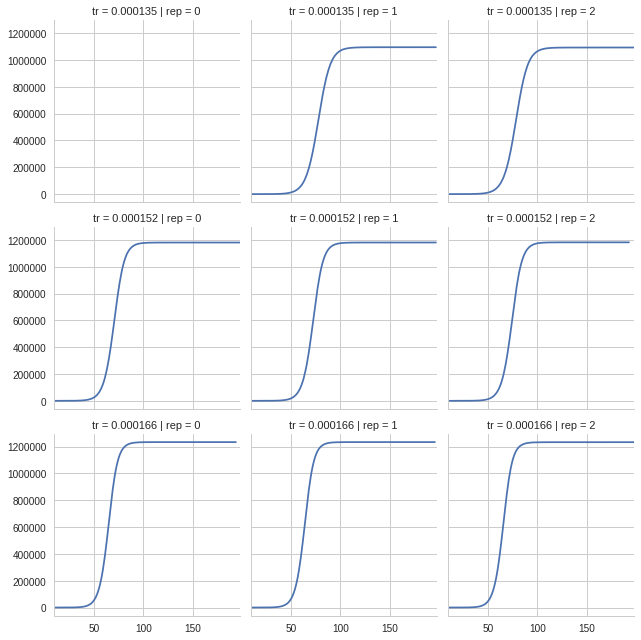

In [103]:
g = sns.FacetGrid(d, row='tr', col='rep')
g.map_dataframe(sns.tsplot, time='intervened', value='cum_sum', condition='tr', unit = 'tr', data= d)

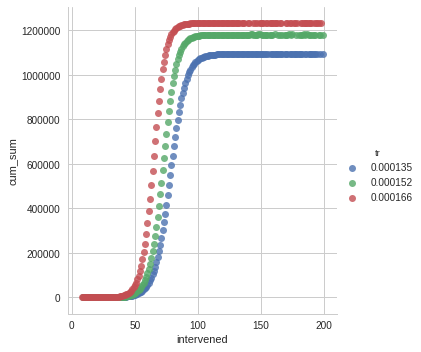

In [104]:
df = d.groupby(['tr', 'intervened'])['cum_sum'].mean().reset_index()
sns.lmplot(x='intervened', y='cum_sum', hue='tr',
           fit_reg=False, data=df)

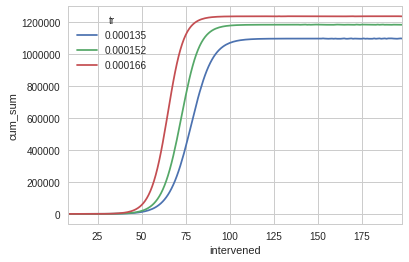

In [105]:
sns.tsplot(time='intervened', value='cum_sum', condition='tr', unit = 'tr', data=df)

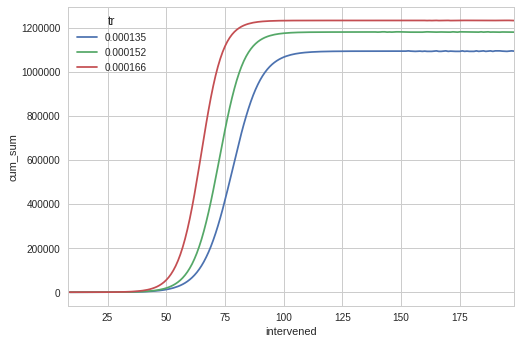

In [117]:
c = sns.plotting_context('notebook', font_scale=1)
with c:
    sns.tsplot(time='intervened', value='cum_sum', condition='tr', unit = 'tr', data=df)